# Packages & Libraries 

This is a list of packages and libraries you will need to execute this code. 

In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials 
import pandas as pd #Dataframe, Series
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import io
from scipy import misc
import spotipy
import spotipy.util as util
sp = spotipy.Spotify() 
import csv
import random
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Getting Your API 

In [44]:
client_id = "SECRET ID" 
client_secret = "SECRET ID" 
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [ ]:
def playlist_trackID(user_ID,playlist_ID):
    """
    This function takes a playlist ID, and the user's ID and returns a track id, popularity, artist name, and track name for each 
    track in the playlist. 
    """
    track_id = []
    popularity = []
    artist_name = []
    track_name = []
    playlist = sp.user_playlist_tracks(user_ID,playlist_ID)
    for song in playlist['items']:
        track = song['track']
        track_id.append(track['id'])
        popularity.append(track['popularity'])
        track_name.append(track['name'])
        artist_name.append(track['artists'][0]['name'])
    return pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})

In [ ]:
def get_audio_features(dataframe_name):
    """
    This function gets all the audio features of a song. 
    """
    afeatures = []
    number = len(dataframe_name)
    for i in range(0,len(dataframe_name['track_id']),number):
        batch = dataframe_name['track_id'][i:i+number]
        audio_features = sp.audio_features(batch)
        for i, t in enumerate(audio_features):
            afeatures.append(t)
    return pd.DataFrame.from_dict(afeatures,orient='columns')

In [ ]:
def merge_dataframes(dataframe1,dataframe2):
    """
    This function serves to merge the two dataframes created. It will first drop the unnecessary columns of the 
    dataframe that has the audio features, and rename the id so it can succesfully merge the two dataframes. 
    It is vital that the arguments in the function are correct.
    """
    drop_columns = ['analysis_url','track_href','type','uri']
    dataframe2.drop(drop_columns,axis=1,inplace=True)
    dataframe2.rename(columns={'id': 'track_id'}, inplace=True)
    return pd.merge(dataframe1,dataframe2,on='track_id',how='inner')

In [46]:
first_dataframe_myat = playlist_trackID('lookitschibbles','37i9dQZF1EjeiPPNs5t2ax')
second_dataframe_myat = get_audio_features(first_dataframe_myat)
final_dataframe_myat = merge_dataframes(first_dataframe_myat,second_dataframe_myat)
final_dataframe_myat.to_csv('Carmen_Spotify.csv')

# Data Pre-Processing



In [5]:
def good_playlist(good_playlist_csv):
    """Making a new column called 'Target' that classifies the good and bad playlists
    
    good: the individual's playlist
    bad: playlist of songs that the individual dislikes 
    """
    good = pd.read_csv(good_playlist_csv)
    target = 1
    good['Target'] = target
    return good
good_playlist('Carmen_Spotify.csv')

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,0,Keala Settle,This Is Me,45aBsnKRWUzhwbcqOJLwfe,79,0.284,0.704,2,-7.276,1,0.1860,0.00583,0.000115,0.0424,0.100,191.702,234707,4,1
1,1,Loren Allred,Never Enough,0Gl5s8IhMmQE5YQwM8Qx1J,78,0.277,0.394,8,-8.903,1,0.0336,0.42300,0.000000,0.0952,0.227,86.777,207787,3,1
2,2,Zac Efron,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,78,0.684,0.619,10,-7.005,1,0.0386,0.07160,0.000000,0.1220,0.284,125.046,217440,4,1
3,3,Logic,1-800-273-8255,5tz69p7tJuGPeMGwNTxYuV,82,0.620,0.574,5,-7.788,0,0.0479,0.57000,0.000000,0.1900,0.352,100.021,250173,4,1
4,4,Macklemore,Glorious (feat. Skylar Grey),0CokSRCu5hZgPxcZBaEzVE,78,0.731,0.794,0,-5.126,0,0.0522,0.03230,0.000026,0.1120,0.356,139.994,220454,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Michael Bublé,Crazy Love,5yHRupjhJzuqxW5WjGTRr7,62,0.420,0.548,2,-7.221,1,0.0398,0.47800,0.000000,0.2590,0.471,77.018,211293,4,1
96,96,Sam Smith,Lay Me Down,74sb4Gib0cL3TQeCjYF8vh,68,0.417,0.332,4,-9.482,1,0.0494,0.77300,0.000019,0.1090,0.172,119.156,253208,4,1
97,97,J. Cole,Photograph,0bhnUFDQFCEHCBlsQfHnj5,67,0.825,0.487,1,-6.416,1,0.2330,0.02990,0.000000,0.0868,0.372,105.050,218954,3,1
98,98,Cashmere Cat,Miss You (with Major Lazer & Tory Lanez),7HdZY9UJTylIiNcSDFyUDc,64,0.747,0.641,1,-4.502,1,0.0925,0.25000,0.001070,0.1060,0.453,100.028,186231,4,1


In [6]:
def bad_playlist(bad_playlist_csv):
    bad = pd.read_csv(bad_playlist_csv)
    target = 0
    bad['Target'] = target
    return bad 
bad_playlist('BadList_Spotify.csv')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,artist_name,track_name,track_id,popularity,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,0,0,0,0,0,Bob Seger,Ramblin' Gamblin' Man,1gZOnv0YjmFIM2oXVin9ZR,16,0.610,...,1,0.0514,0.0207,0.000000,0.0569,0.875,130.577,145311,4,0
1,1,1,1,1,1,The Rolling Stones,"Paint It, Black - Mono",1RJeiAIwR9pZBgJA8ndZLL,67,0.505,...,0,0.1010,0.0103,0.077100,0.2950,0.764,159.669,204480,4,0
2,2,2,2,2,2,The Doors,Light My Fire,5uvosCdMlFdTXhoazkTI5R,73,0.413,...,0,0.0324,0.3690,0.000022,0.0905,0.440,124.618,429760,4,0
3,3,3,3,3,3,AC/DC,Back In Black,08mG3Y1vljYA6bvDt4Wqkj,84,0.310,...,1,0.0470,0.0110,0.009650,0.0828,0.763,188.386,255493,4,0
4,4,4,4,4,4,The Clash,Should I Stay or Should I Go - Remastered,39shmbIHICJ2Wxnk1fPSdz,80,0.742,...,1,0.1150,0.0790,0.000000,0.3840,0.816,113.375,188987,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,95,95,95,Eric Clapton,Cocaine,2udGjDmpK1dH9VGyw7nrei,71,0.699,...,1,0.0278,0.0607,0.033700,0.3170,0.676,105.266,221640,4,0
96,96,96,96,96,96,AC/DC,Highway to Hell,2zYzyRzz6pRmhPzyfMEC8s,85,0.573,...,0,0.1320,0.0591,0.001730,0.1560,0.422,115.715,208400,4,0
97,97,97,97,97,97,The Who,Behind Blue Eyes - Original Album Version,6Qg7cgN1oZ5mG5nZe9UG0X,18,0.399,...,1,0.0318,0.2290,0.001220,0.2620,0.285,127.084,223333,4,0
98,98,98,98,98,98,The Doors,Break on Through (To the Other Side),6ToM0uwxtPKo9CMpbPGYvM,73,0.421,...,1,0.0472,0.2000,0.000000,0.1700,0.789,89.839,145867,4,0


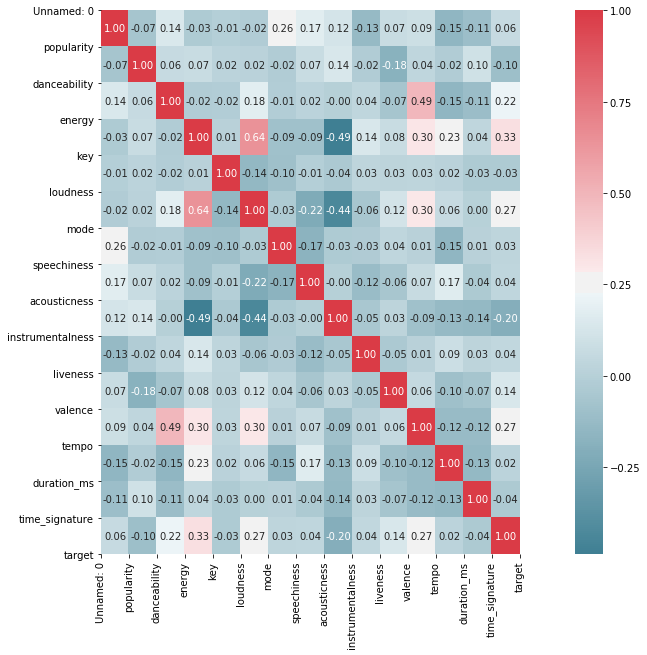

In [13]:
def correlation_map(df):
    """
    This checks for any missing values in the dataframe 
    """
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (10,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, cmap = colormap, annot = True, fmt = '.2f')
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
correlation_map(good_playlist("Carmen_Spotify.csv"))

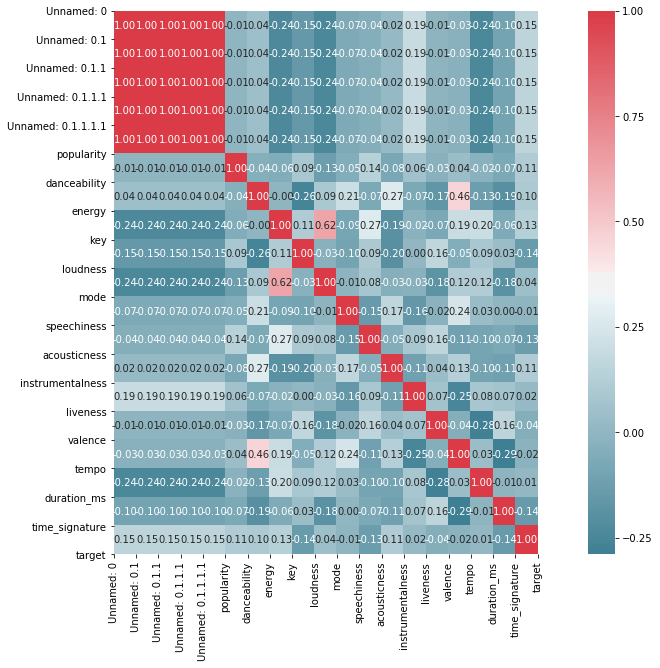

In [14]:
correlation_map(bad_playlist("BadList_Spotify.csv"))

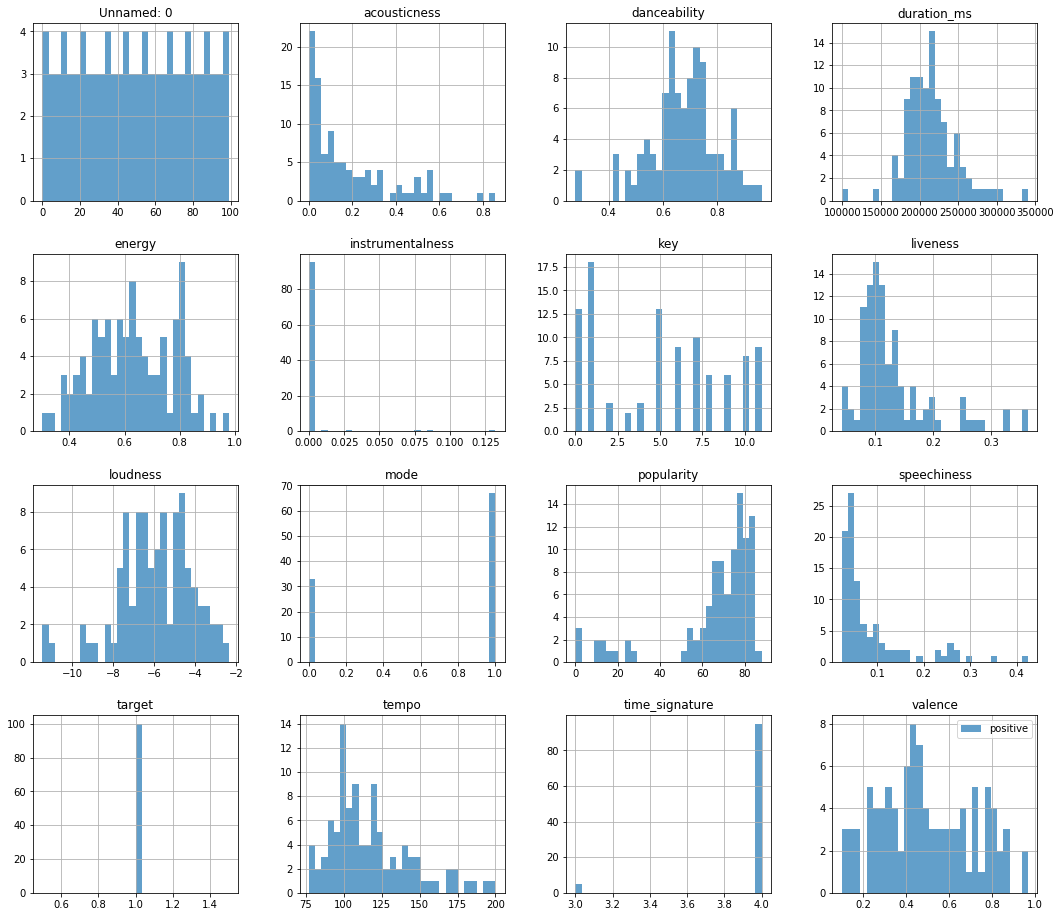

In [18]:
def good_hist(df):
    """
    Histograms comparing the variables in each playlist
    """
    good = good_playlist(df)
    good.hist(alpha = 0.7, bins = 30, label = 'positive', figsize = (18, 16))
    plt.legend(loc = 'upper right')
    return plt.show()
good_hist('Carmen_Spotify.csv')

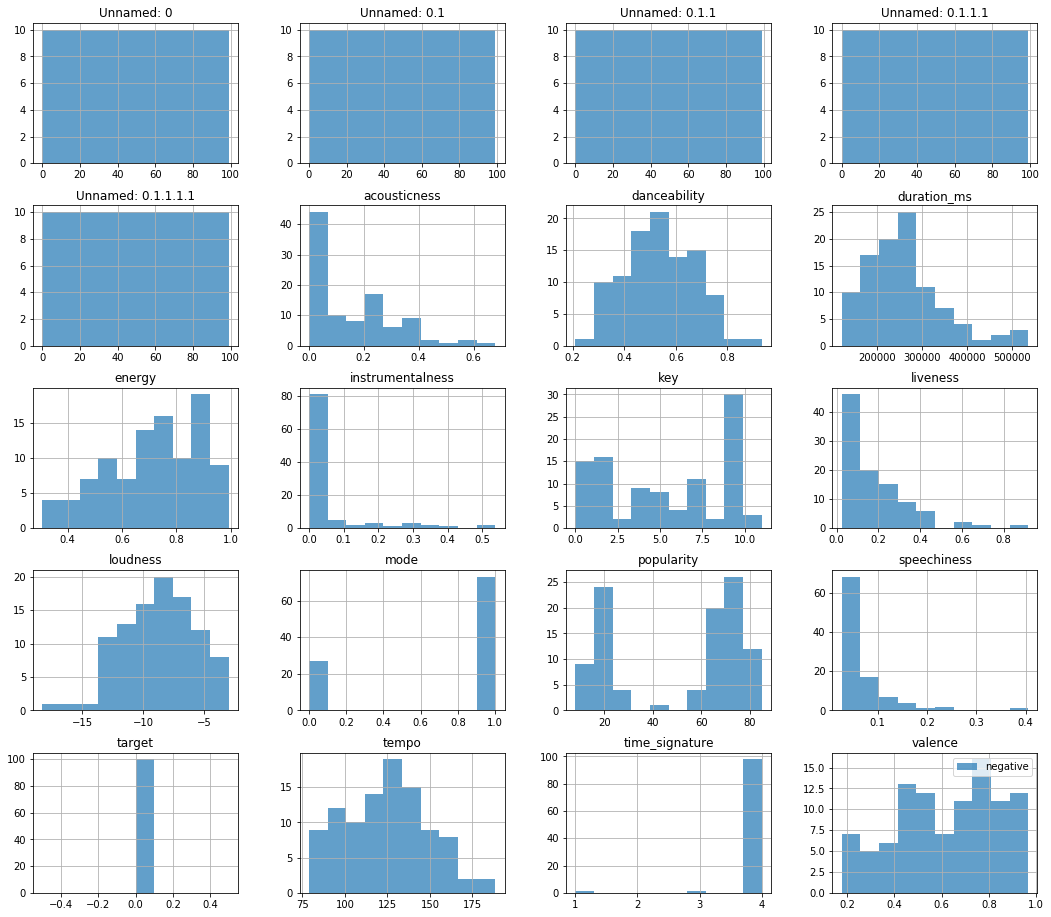

In [20]:
def bad_hist(df):
    bad = bad_playlist(df)
    bad.hist(alpha = 0.7, label = 'negative', figsize = (18, 16))
    plt.legend(loc = 'upper right')
    return plt.show()
bad_hist('BadList_Spotify.csv')

In [22]:
def one_playlist(df_1, df_2):
    """
    Combining the good and bad playlist into one dataframe
    """
    good = good_playlist(df_1)
    bad = bad_playlist(df_2)
    frames = [good, bad]
    combined = pd.concat(frames, sort = True)
    return combined
df_1 = 'Carmen_Spotify.csv'
df_2 = 'BadList_Spotify.csv'
one_playlist(df_1, df_2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,acousticness,artist_name,danceability,duration_ms,energy,...,loudness,mode,popularity,speechiness,target,tempo,time_signature,track_id,track_name,valence
0,0,NaN,NaN,NaN,NaN,0.00583,Keala Settle,0.284,234707,0.704,...,-7.276,1,79,0.1860,1,191.702,4,45aBsnKRWUzhwbcqOJLwfe,This Is Me,0.100
1,1,NaN,NaN,NaN,NaN,0.42300,Loren Allred,0.277,207787,0.394,...,-8.903,1,78,0.0336,1,86.777,3,0Gl5s8IhMmQE5YQwM8Qx1J,Never Enough,0.227
2,2,NaN,NaN,NaN,NaN,0.07160,Zac Efron,0.684,217440,0.619,...,-7.005,1,78,0.0386,1,125.046,4,65fpYBrI8o2cfrwf2US4gq,Rewrite The Stars,0.284
3,3,NaN,NaN,NaN,NaN,0.57000,Logic,0.620,250173,0.574,...,-7.788,0,82,0.0479,1,100.021,4,5tz69p7tJuGPeMGwNTxYuV,1-800-273-8255,0.352
4,4,NaN,NaN,NaN,NaN,0.03230,Macklemore,0.731,220454,0.794,...,-5.126,0,78,0.0522,1,139.994,4,0CokSRCu5hZgPxcZBaEzVE,Glorious (feat. Skylar Grey),0.356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95.0,95.0,95.0,95.0,0.06070,Eric Clapton,0.699,221640,0.502,...,-12.526,1,71,0.0278,0,105.266,4,2udGjDmpK1dH9VGyw7nrei,Cocaine,0.676
96,96,96.0,96.0,96.0,96.0,0.05910,AC/DC,0.573,208400,0.913,...,-4.793,0,85,0.1320,0,115.715,4,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,0.422
97,97,97.0,97.0,97.0,97.0,0.22900,The Who,0.399,223333,0.518,...,-10.637,1,18,0.0318,0,127.084,4,6Qg7cgN1oZ5mG5nZe9UG0X,Behind Blue Eyes - Original Album Version,0.285
98,98,98.0,98.0,98.0,98.0,0.20000,The Doors,0.421,145867,0.751,...,-9.584,1,73,0.0472,0,89.839,4,6ToM0uwxtPKo9CMpbPGYvM,Break on Through (To the Other Side),0.789


In [23]:
def remove_col(df_1, df_2):
    """
    Deleting the unnecessary columns that label row IDs
    """
    combined = one_playlist(df_1, df_2)
    keep_col = ['artist_name', 'track_name', 'track_id', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'target']
    new_rr = combined[keep_col]
    return new_rr
remove_col(df_1, df_2)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,Keala Settle,This Is Me,45aBsnKRWUzhwbcqOJLwfe,79,0.284,0.704,2,-7.276,1,0.1860,0.00583,0.000115,0.0424,0.100,191.702,234707,4,1
1,Loren Allred,Never Enough,0Gl5s8IhMmQE5YQwM8Qx1J,78,0.277,0.394,8,-8.903,1,0.0336,0.42300,0.000000,0.0952,0.227,86.777,207787,3,1
2,Zac Efron,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,78,0.684,0.619,10,-7.005,1,0.0386,0.07160,0.000000,0.1220,0.284,125.046,217440,4,1
3,Logic,1-800-273-8255,5tz69p7tJuGPeMGwNTxYuV,82,0.620,0.574,5,-7.788,0,0.0479,0.57000,0.000000,0.1900,0.352,100.021,250173,4,1
4,Macklemore,Glorious (feat. Skylar Grey),0CokSRCu5hZgPxcZBaEzVE,78,0.731,0.794,0,-5.126,0,0.0522,0.03230,0.000026,0.1120,0.356,139.994,220454,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Eric Clapton,Cocaine,2udGjDmpK1dH9VGyw7nrei,71,0.699,0.502,9,-12.526,1,0.0278,0.06070,0.033700,0.3170,0.676,105.266,221640,4,0
96,AC/DC,Highway to Hell,2zYzyRzz6pRmhPzyfMEC8s,85,0.573,0.913,6,-4.793,0,0.1320,0.05910,0.001730,0.1560,0.422,115.715,208400,4,0
97,The Who,Behind Blue Eyes - Original Album Version,6Qg7cgN1oZ5mG5nZe9UG0X,18,0.399,0.518,7,-10.637,1,0.0318,0.22900,0.001220,0.2620,0.285,127.084,223333,4,0
98,The Doors,Break on Through (To the Other Side),6ToM0uwxtPKo9CMpbPGYvM,73,0.421,0.751,9,-9.584,1,0.0472,0.20000,0.000000,0.1700,0.789,89.839,145867,4,0


In [24]:
def variable_type(df_1, df_2):
    """
    Changing Variable Types from object to numeric values
    """
    variable = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]
    for audio_feature in variable:
        new_rr = remove_col(df_1, df_2)
        new_rr[audio_feature] = pd.to_numeric(new_rr[audio_feature], errors = 'coerce')
    return new_rr.dtypes
variable_type(df_1, df_2)

artist_name          object
track_name           object
track_id             object
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
target                int64
dtype: object

# Prediction Models

This section of the code will build prediction models using Decision Tree Classification, Random Forest Classifier, and KNN Classifier

In [26]:
new_rr = remove_col(df_1, df_2)
random_seed = 5 # set random seed for reproducible results 
variables = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]
X = new_rr[variables] # using the variables we would like to use
y = new_rr["target"] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_seed) # 80% training and 20% test


In [27]:
def decision_tree():
    # Decision Tree Classification Model
    first_DT_clf = DecisionTreeClassifier() # Decision Tree classifier object
    first_DT_clf = first_DT_clf.fit(X_train, y_train) # train Decision Tree Classifier
    y_pred = first_DT_clf.predict(X_test) # predict the response for the test dataset
    
    # Decision Tree Model Accuracy
    accuracy = (accuracy_score(y_test, y_pred))
    print(f'Accuracy: {accuracy*100}%')
    
    # Decision Tree Classifier Confusion Matrix
    results = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix :')
    print(results)
    print('Report for Decision Tree Model : ')
    print(classification_report(y_test, y_pred))
decision_tree()

Accuracy: 75.0%
Confusion Matrix :
[[12  6]
 [ 4 18]]
Report for Decision Tree Model : 
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.75      0.82      0.78        22

    accuracy                           0.75        40
   macro avg       0.75      0.74      0.74        40
weighted avg       0.75      0.75      0.75        40



In [30]:
def random_forest():
    # Random Forest Tree Model
    RF_CLF = RandomForestClassifier()
    RF_CLF.fit(X_train, y_train)
    RF_pred = RF_CLF.predict(X_test)
    
    # Random Forest Model Accuracy
    accuracy_RF = (accuracy_score(y_test, RF_pred))
    print(f'Accuracy: {accuracy_RF*100}%')
    
    # Random Forest Tree Model Confusion Matrix
    results = confusion_matrix(y_test, RF_pred)
    print('Confusion Matrix :')
    print(results)
    print('Report for Random Forest Model : ')
    print(classification_report(y_test, RF_pred))
random_forest()

Accuracy: 82.5%
Confusion Matrix :
[[15  3]
 [ 4 18]]
Report for Random Forest Model : 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.86      0.82      0.84        22

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



C:\Users\cngo1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
def knn_model():
    # KNN Model
    knn = KNeighborsClassifier(3)
    knn.fit(X_train, y_train)
    first_DT_clf = DecisionTreeClassifier()
    first_DT_clf = first_DT_clf.fit(X_train, y_train) # train Decision Tree Classifier
    knn_pred = first_DT_clf.predict(X_test)
    
    # KNN Model Accuracy
    score = accuracy_score(y_test, knn_pred)*100
    print(f'Accuracy using KNN Tree: {round(score, 1)}%')
    
    # KNN Confusion Matrix
    results = confusion_matrix(y_test, knn_pred)
    print('Confusion Matrix :')
    print(results)
    print('Report for KNN Model : ')
    print(classification_report(y_test, knn_pred))
knn_model()

Accuracy using KNN Tree: 75.0%
Confusion Matrix :
[[12  6]
 [ 4 18]]
Report for KNN Model : 
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.75      0.82      0.78        22

    accuracy                           0.75        40
   macro avg       0.75      0.74      0.74        40
weighted avg       0.75      0.75      0.75        40



# Predicting Which Songs You Will Like



In [43]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials # to access authorized Spotify data

client_id = "4b15fcc288d3420abde032fde2e986ef" # Myat's Spotify ID
client_secret = "6858e0e37841416684238be3c8d09e35" # Myat's Spotify Secret Key
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager) # Spotify object to access API

from myat import playlist_trackID
from myat import get_audio_features
from myat import merge_dataframes
from myat import main

first_dataframe_spotify = playlist_trackID('spotify','37i9dQZF1DXdwmD5Q7Gxah')
second_dataframe_spotify = get_audio_features(first_dataframe_spotify)
final_dataframe_spotify = merge_dataframes(first_dataframe_spotify,second_dataframe_spotify)

RF_CLF = RandomForestClassifier()
RF_CLF.fit(X_train, y_train)
pred = RF_CLF.predict(final_dataframe_spotify[variables])

def recc_songs():
    likedSongs = 0
    i = 0
    for prediction in pred:
        if (prediction ==1):
            print("Song: " + final_dataframe_spotify['track_name'][i] + ", By:" + final_dataframe_spotify['artist_name'][i])
            likedSongs += 1
        i += 1
recc_songs()

Song: Monsta, By:BENEE
Song: hello!, By:ROLE MODEL
Song: Stay, By:Gracie Abrams
Song: Decide, By:Jelani Aryeh
Song: Maniac, By:Conan Gray
Song: 4Tounce, By:Johnny Utah
Song: Adore You, By:Harry Styles
Song: dancefloor, By:marcos g
Song: Glitter, By:BENEE
Song: of being alone, By:Grady
Song: prom dress, By:mxmtoon
Song: hiccups (as an adult), By:maxime.
Song: North, By:Clairo
Song: Chanel, By:Frank Ocean
Song: Supalonely, By:BENEE
Song: BULLDOG, By:LAUNDRY DAY
Song: I CHOOSE YOU, By:Adam Melchor
Song: Money Diamonds Roses, By:Lolo Zouaï
Song: say it first, By:ROLE MODEL
Song: Hit Me Up, By:Omar Apollo
Song: right here, By:keshi
Song: Renaissance, By:Nolie
Song: blame game, By:mxmtoon
Song: useless, By:RUFUS
Song: Breathe, By:UMI
Song: Yellow Hearts, By:Ant Saunders
Song: come ovr, By:sophie meiers
Song: Fade, By:Cailin Russo
Song: blue skies, By:gabriel black
Song: July (feat. Leon Bridges), By:Noah Cyrus
Song: Always, By:Rex Orange County
Song: Wishful Thinking, By:BENEE
Song: Please N

C:\Users\cngo1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
